In [40]:
import matplotlib.pyplot as plt
import os


def getData(fileName):
    line = os.popen('tail -1 ~/plgzeus/bhnn/'+fileName).read()
    cells = line.split()

    M=96
    sweeps = int(cells[cells.index("Sweep=")+1])
    rtime = int(cells[cells.index("rtime=")+1])
    vmemPeak = int(cells[cells.index("vmemPeakkB=")+1])
    dim = int(cells[cells.index("dim=")+1])
    H = float(cells[cells.index("H=")+1])
    Ell = float(cells[cells.index("Ell=")+1])
    N = float(cells[cells.index("N=")+1])
    Ni = []
    G2 = []
    Xs = []
    indexNi = cells.index("Ni=")
    indexNcNi = cells.index("NcNi=")
    for i in range(M):
        Xs.append(-0.5+float(i)/M+1.0/float(M))
        Ni.append(float(cells[indexNi+1+i]))
        if i == int(M/2)-1:
            G2.append(float(cells[indexNcNi+1+i])-Ni[i])
        else:
            G2.append(float(cells[indexNcNi+1+i]))
    return [Xs,Ni,G2,H,sweeps]

def plotG2(label,fileName,lineType='_'):
    [Xs,Ni,G2,E,sweeps] = getData(fileName)
    plt.plot(Xs,G2,lineType,label=label+" (E= "+str(round(E, 2))+", Sw="+str(sweeps)+")")
    
def plotNi(label,fileName,lineType='_'):
    [Xs,Ni,G2,E,sweeps] = getData(fileName)
    plt.plot(Xs,Ni,lineType,label=label+" (E= "+str(round(E, 2))+", Sw="+str(sweeps)+")")
######################################################################
# [Xs,Ni,G2,H,sweeps] = getData('OBC_M96_J1.0_GS/N8_U10.0_Unn-4.0_.out')
# plt.plot(Xs,Ni)

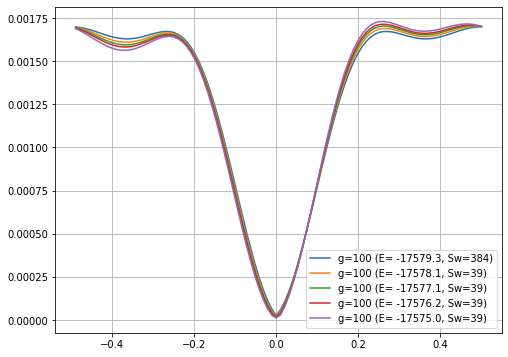

In [47]:
plt.figure(figsize=[8,6])

plotG2("g=100", 'N4_M96_g100_gnn0_.out', "-")
plotG2("g=100", 'N4_M96_g100_gnn10_.out', "-")
plotG2("g=100", 'N4_M96_g100_gnn20_.out', "-")
plotG2("g=100", 'N4_M96_g100_gnn30_.out', "-")
plotG2("g=100", 'N4_M96_g100_gnn50_.out', "-")

plt.grid()
plt.legend()
#plt.savefig("images/diagram_1.png")
plt.show()